# Getting Started with Datacube Stats
| Author(s):  | [Arapaut Sivaprasad](mailto:Sivaprasad.Arapaut@ga.gov.au)|
|----------|----------------|
| Created: | May 17, 2018 |
| Last edited: | May 21, 2018 |
| Acknowledgements: | Imam Alam|

## About this document

**Background**

Data Cube Statistics is a an application to calculate large scale temporal statistics on data stored using an Open Data Cube (ODC) installation. It provides a command line application which uses a YAML configuration file to specify the data range and statistics to calculate.

**What does this document do?**

This document is a startup guide to using the 'document-stats' program to analyse continental scale statistics over a 30+ year time range. It aims to get you started using the program, with basic examples and statistical analyses. Please see **Advanced Users Guide for Datacube-stats** for more complex analyses and options.

The program is intended to be run from commandline, or as a queue job, on Raijin. It takes several minutes to several hours to complete the job. However, in order to understand the usage and to see the output in a visual manner, this document will show an interactive session to analyse just one scene or "tile", which takes only a few seconds. Below it will be given the detailed instructions to run the program on Raijin interactively and through queue jobs.

A basic understanding of the PSB job scheduler on Raijin is advantageous, but not essential, to follow the instructions in this document. You must have, as expected to be, an account on Raijin with memebership in at least one project. Please verify with your supervisor about which project to use and how much resources are allocated to your research. The costs will vary depending on the type of PBS queue used as well as the complexity and size of the job.

**How to use this document**

There are five sections that describe the software and its usage. You can skip any section by clicking its heading line.

1. Backgound information about the software and its inputs and outputs.
2. Run interactively through Jupyter notebook.
3. Run interactively in a Unix shell and and monitor the progress.
4. Submit to a PBS job queue and monitor the progress.
5. Visualise the outputs.

## SECTION 1: Background on 'Datacube-stats' Application


### Data Cube Statistics Tools
Data Cube Statistics is an application to calculate large scale temporal statistics on data stored using an Open Data Cube (ODC) installation. It provides a command line application which uses a YAML configuration file to specify the data range and statistics to calculate.

#### Main Features

- Calculate continental scale statistics over a 30+ year time range.
- Simple yet powerful Configuration format.
- Scripts supplied for running in a HPC PBS based environment.
- Flexible tiling and chunking for efficient execution of 100+Tb jobs.
- Track and store full provenance record of operations.
- Round-trip workflow from ODC back into ODC.
- Supports saving to NetCDF, GeoTIFF or other GDAL supported format.
- Optional per-pixel metadata tracking.
- Out of the box support for most common statistics - see Available statistics.
- Able to create user defined Custom statistics.
- Able to handle any CRS and resolution combination (through the power of the ODC).

#### Usage
This is a commandline-driven program and all configurations are specified in a YAML file. The simplest way to execute it is as below.

> $ datacube-stats example-configuration.yaml




#### Available Statistics
The following statistical methods are implemented.

- simple
- percentile
- percentile_no_prov
- medoid
- medoid_no_prov
- medoid_simple
- simple_normalised_difference
- none
- wofs_summary
- tcwbg_summary
- masked_multi_count
- external
- wofs-summary
- geomedian

In [89]:
%matplotlib inline
import datacube
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np
from collections import namedtuple

import yaml
from datacube_stats import StatsApp
from datacube import Datacube
import matplotlib.gridspec as gridspec

import sys
import os
sys.path.append(os.path.expanduser('~/dea-notebooks/Scripts'))
import DEAPlotting
import DEADataHandling



## Configuration File
The entire config for this application resides in a YAML file as given below. More details about its components later...

In [90]:
def main_0():
    config_yaml = """
    sources:
      - product: ls5_nbar_albers
        measurements: [red, green, blue]
        group_by: solar_day

    date_ranges:
        start_date: 2011-01-01
        end_date: 2011-12-01

    storage:
        # this driver enables in-memory computation
        driver: xarray

        crs: EPSG:3577
        tile_size:
            x: 40000.0
            y: 40000.0
        resolution:
            x: 25
            y: -25
        chunking:
            x: 200
            y: 200
            time: 1
        dimension_order: [time, y, x]

    computation:
        chunking:
            x: 800
            y: 800

    date_ranges:
      start_date: 2011-01-01
      end_date: 2011-01-31

#    input_region:
#          longitude: [149.05, 149.17]
#          latitude: [-35.25, -35.35]
#
    output_products:
        - name: nbar_mean
          statistic: simple
          statistic_args:
               reduction_function: mean
    """
    return config_yaml
#    print(config_yaml)
    # or manually creating a config dictionary works too

### Create and load the config
Instead of a YAML format as above, the whole data can be specified as a dictionary object (see below). The advantage of YAML is that it is more human readable.

In [91]:
    config_yaml = main()
    config = yaml.load(config_yaml)
#    print(yaml.dump(config, indent=4))
#    print(config)


### Define the datacube stats application

In [92]:
dc = Datacube()
app = StatsApp(config, dc.index)

{'sources': [{'product': 'ls5_nbar_albers', 'measurements': ['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], 'group_by': 'solar_day', 'source_filter': {'product': 'ls5_level1_scene', 'gqa_iterative_mean_xy': [0, 1]}, 'masks': [{'product': 'ls5_pq_albers', 'measurement': 'pixelquality', 'group_by': 'solar_day', 'fuse_func': 'datacube.helpers.ga_pq_fuser', 'flags': {'contiguous': True, 'cloud_acca': 'no_cloud', 'cloud_fmask': 'no_cloud', 'cloud_shadow_acca': 'no_cloud_shadow', 'cloud_shadow_fmask': 'no_cloud_shadow', 'blue_saturated': False, 'green_saturated': False, 'red_saturated': False, 'nir_saturated': False, 'swir1_saturated': False, 'swir2_saturated': False}}]}, {'product': 'ls7_nbar_albers', 'measurements': ['blue', 'green', 'red', 'nir', 'swir1', 'swir2'], 'group_by': 'solar_day', 'source_filter': {'product': 'ls7_level1_scene', 'gqa_iterative_mean_xy': [0, 1]}, 'masks': [{'product': 'ls7_pq_albers', 'measurement': 'pixelquality', 'group_by': 'solar_day', 'fuse_func': 'datacub

### Generate the tasks
Do not know yet what the tasks are. Will update it as I learn more!

This example is taking a simple mean of the data spread over the date range. There are other methods that are more complex.

In [93]:
#print('generating tasks')
tasks = app.generate_tasks()
#print (dir(tasks))

### Run the tasks

In [94]:
query = {
        'lat': (-35.25, -35.35),
        'lon': (149.05, 149.17),
        'time':('2017-01-01', '2017-01-15')
        }

In [95]:
def calculate_boundingbox(ds):
    Extent = namedtuple('Extent', ['boundingbox'])
    BoundingBox = namedtuple('BoundingBox', ['left', 'bottom', 'right', 'top'])
    left = ds.x.min().item()
    right = ds.x.max().item()
    top = ds.y.min().item()
    bottom=ds.y.max().item()
    return Extent(boundingbox=BoundingBox(left=left, bottom=bottom, right=right, top=top))

In [96]:
    print('Running tasks. May take some time. Be patient!')
    for task in tasks:
#        print(task)
        # this method is only available for the xarray output driver
        output = app.execute_task(task)
        print("output: ", output)
        ds = output.result['nbar_mean']
#    print(dir(ds))
    ds.attrs['crs'] = 'EPSG:3577'
    ds.attrs['extent'] = calculate_boundingbox(ds)


Running tasks. May take some time. Be patient!
output:  


In [97]:
ds.extent.boundingbox

BoundingBox(left=1542337.5, bottom=-3953087.5, right=1554612.5, top=-3965562.5)

### Plot it as a grid first

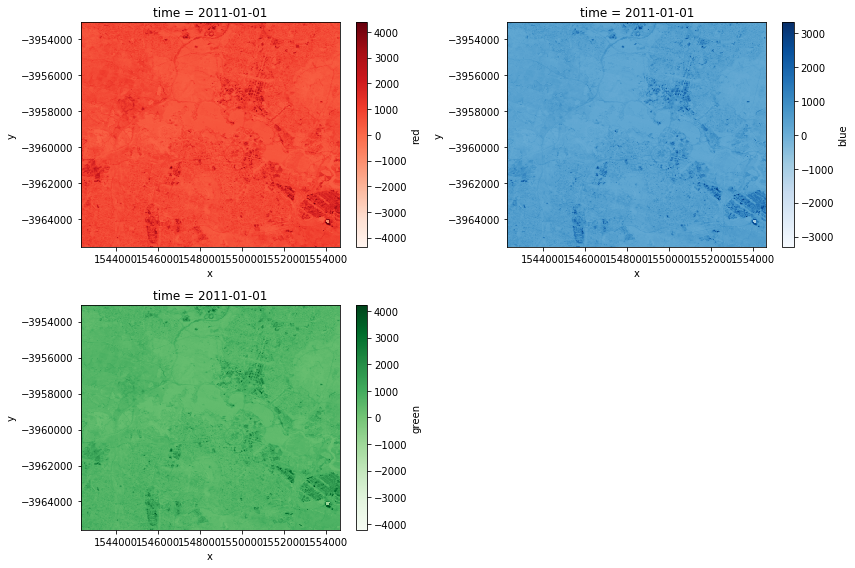

In [98]:
plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2,2) # set up a 2 x 2 grid of 4 images for better presentation

ax1=plt.subplot(gs[0,0])
ds.red.isel(time=0).plot(cmap='Reds')

ax2=plt.subplot(gs[1,0])
ds.green.isel(time=0).plot(cmap='Greens')

ax3=plt.subplot(gs[0,1])
ds.blue.isel(time=0).plot(cmap='Blues')

plt.tight_layout()
plt.show()

### Plot it as three bands

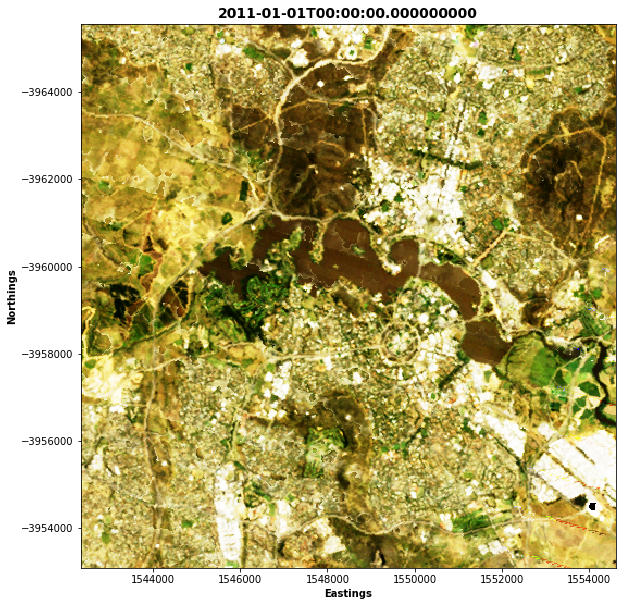

In [99]:
DEAPlotting.three_band_image(ds, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=True);